# Table of Contents
 <p><div class="lev1"><a href="#Introduction-to-Pandas"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction to Pandas</a></div><div class="lev2"><a href="#Pandas-Data-Structures"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Pandas Data Structures</a></div><div class="lev3"><a href="#Series"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Series</a></div><div class="lev3"><a href="#DataFrame"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>DataFrame</a></div><div class="lev3"><a href="#Exercise"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Exercise</a></div><div class="lev3"><a href="#Exercise"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Exercise</a></div><div class="lev2"><a href="#Importing-data"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Importing data</a></div><div class="lev3"><a href="#Microsoft-Excel"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Microsoft Excel</a></div><div class="lev2"><a href="#Pandas-Fundamentals"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Pandas Fundamentals</a></div><div class="lev3"><a href="#Manipulating-indices"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Manipulating indices</a></div><div class="lev2"><a href="#Indexing-and-Selection"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Indexing and Selection</a></div><div class="lev3"><a href="#Exercise"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Exercise</a></div><div class="lev2"><a href="#Operations"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Operations</a></div><div class="lev2"><a href="#Sorting-and-Ranking"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Sorting and Ranking</a></div><div class="lev3"><a href="#Exercise"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Exercise</a></div><div class="lev2"><a href="#Hierarchical-indexing"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Hierarchical indexing</a></div><div class="lev2"><a href="#Missing-data"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Missing data</a></div><div class="lev3"><a href="#Exercise"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>Exercise</a></div><div class="lev2"><a href="#Data-summarization"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Data summarization</a></div><div class="lev2"><a href="#Writing-Data-to-Files"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Writing Data to Files</a></div><div class="lev3"><a href="#Advanced-Exercise:-Compiling-Ebola-Data"><span class="toc-item-num">1.10.1&nbsp;&nbsp;</span>Advanced Exercise: Compiling Ebola Data</a></div><div class="lev2"><a href="#References"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>References</a></div>

# Introduction to Pandas

**pandas** is a Python package providing fast, flexible, and expressive data structures designed to work with *relational* or *labeled* data both. It is a fundamental high-level building block for doing practical, real world data analysis in Python. 

pandas is well suited for:

- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
- Ordered and unordered (not necessarily fixed-frequency) time series data.
- Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
- Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure


Key features:
    
- Easy handling of **missing data**
- **Size mutability**: columns can be inserted and deleted from DataFrame and higher dimensional objects
- Automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the data can be aligned automatically
- Powerful, flexible **group by functionality** to perform split-apply-combine operations on data sets
- Intelligent label-based **slicing, fancy indexing, and subsetting** of large data sets
- Intuitive **merging and joining** data sets
- Flexible **reshaping and pivoting** of data sets
- **Hierarchical labeling** of axes
- Robust **IO tools** for loading data from flat files, Excel files, databases, and HDF5
- **Time series functionality**: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

In [10]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

## Pandas Data Structures

### Series

A **Series** is a single vector of data (like a NumPy array) with an *index* that labels each element in the vector.

In [11]:
counts = pd.Series([632, 1638, 569, 115])
counts

0     632
1    1638
2     569
3     115
dtype: int64

If an index is not specified, a default sequence of integers is assigned as the index. A NumPy array comprises the values of the `Series`, while the index is a pandas `Index` object.

In [12]:
counts.values

array([ 632, 1638,  569,  115])

In [13]:
counts.index

RangeIndex(start=0, stop=4, step=1)

We can assign meaningful labels to the index, if they are available:

In [14]:
bacteria = pd.Series([632, 1638, 569, 115], 
    index=['Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes'])

bacteria

Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
dtype: int64

These labels can be used to refer to the values in the `Series`.

In [15]:
bacteria['Actinobacteria']

569

In [16]:
bacteria[[name.endswith('bacteria') for name in bacteria.index]]

Proteobacteria    1638
Actinobacteria     569
dtype: int64

In [17]:
[name.endswith('bacteria') for name in bacteria.index]

[False, True, True, False]

Notice that the indexing operation preserved the association between the values and the corresponding indices.

We can still use positional indexing if we wish.

In [18]:
bacteria[0]

632

We can give both the array of values and the index meaningful labels themselves:

In [20]:
bacteria.name = 'counts'
bacteria.index.name = 'phylum'
bacteria

phylum
Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
Name: counts, dtype: int64

NumPy's math functions and other operations can be applied to Series without losing the data structure.

In [21]:
np.log(bacteria)

phylum
Firmicutes        6.448889
Proteobacteria    7.401231
Actinobacteria    6.343880
Bacteroidetes     4.744932
Name: counts, dtype: float64

We can also filter according to the values in the `Series`:

In [22]:
bacteria[bacteria>1000]

phylum
Proteobacteria    1638
Name: counts, dtype: int64

A `Series` can be thought of as an ordered key-value store. In fact, we can create one from a `dict`:

In [23]:
bacteria_dict = {'Firmicutes': 632, 'Proteobacteria': 1638, 'Actinobacteria': 569,
                 'Bacteroidetes': 115}
pd.Series(bacteria_dict)

Actinobacteria     569
Bacteroidetes      115
Firmicutes         632
Proteobacteria    1638
dtype: int64

Notice that the `Series` is created in key-sorted order.

If we pass a custom index to `Series`, it will select the corresponding values from the dict, and treat indices without corrsponding values as missing. Pandas uses the `NaN` (not a number) type for missing values.

In [24]:
bacteria2 = pd.Series(bacteria_dict, 
                      index=['Cyanobacteria','Firmicutes',
                             'Proteobacteria','Actinobacteria'])
bacteria2

Cyanobacteria        NaN
Firmicutes         632.0
Proteobacteria    1638.0
Actinobacteria     569.0
dtype: float64

In [25]:
bacteria2.isnull()

Cyanobacteria      True
Firmicutes        False
Proteobacteria    False
Actinobacteria    False
dtype: bool

Critically, the labels are used to **align data** when used in operations with other Series objects:

In [27]:
bacteria + bacteria2

Actinobacteria    1138.0
Bacteroidetes        NaN
Cyanobacteria        NaN
Firmicutes        1264.0
Proteobacteria    3276.0
dtype: float64

Contrast this with NumPy arrays, where arrays of the same length will combine values element-wise; adding Series combined values with the same label in the resulting series. Notice also that the missing values were propogated by addition.

### DataFrame

Inevitably, we want to be able to store, view and manipulate data that is *multivariate*, where for every index there are multiple fields or columns of data, often of varying data type.

A `DataFrame` is a tabular data structure, encapsulating multiple series like columns in a spreadsheet. Data are stored internally as a 2-dimensional object, but the `DataFrame` allows us to represent and manipulate higher-dimensional data.

In [30]:
data = pd.DataFrame({'value':[632, 1638, 569, 115, 433, 1130, 754, 555],
                     'patient':[1, 1, 1, 1, 2, 2, 2, 2],
                     'phylum':['Firmicutes', 'Proteobacteria', 'Actinobacteria', 
    'Bacteroidetes', 'Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes']})
data

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,1130
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


Notice the `DataFrame` is sorted by column name. We can change the order by indexing them in the order we desire:

In [31]:
data[['phylum','value','patient']]

,phylum,value,patient
0,Firmicutes,632,1
1,Proteobacteria,1638,1
2,Actinobacteria,569,1
3,Bacteroidetes,115,1
4,Firmicutes,433,2
5,Proteobacteria,1130,2
6,Actinobacteria,754,2
7,Bacteroidetes,555,2


A `DataFrame` has a second index, representing the columns:

In [32]:
data.columns

Index(['patient', 'phylum', 'value'], dtype='object')

The `dtypes` attribute reveals the data type for each column in our DataFrame. 

- `int64` is numeric integer values 
- `object` strings (letters and numbers)
- `float64` floating-point values

In [34]:
data.dtypes

patient     int64
phylum     object
value       int64
dtype: object

If we wish to access columns, we can do so either by dict-like indexing or by attribute:

In [35]:
data['patient']

0    1
1    1
2    1
3    1
4    2
5    2
6    2
7    2
Name: patient, dtype: int64

In [36]:
data.patient

0    1
1    1
2    1
3    1
4    2
5    2
6    2
7    2
Name: patient, dtype: int64

In [37]:
type(data.value)

pandas.core.series.Series

In [38]:
data[['value']]

,value
0,632
1,1638
2,569
3,115
4,433
5,1130
6,754
7,555


Notice this is different than with `Series`, where dict-like indexing retrieved a particular element (row). 

If we want access to a row in a `DataFrame`, we index its `loc` attribute.

In [40]:
data.loc[3]

patient                1
phylum     Bacteroidetes
value                115
Name: 3, dtype: object

### Exercise

Try out these commands to see what they return:

- `data.head()`
- `data.tail(3)`
- `data.shape`

In [41]:
#data.head()
#data.tail(3)
data.shape

(8, 3)

* Hi
* Hello
$e^{i\pi} + 1 = 0$

In [42]:
data = pd.DataFrame([{'patient': 1, 'phylum': 'Firmicutes', 'value': 632},
                    {'patient': 1, 'phylum': 'Proteobacteria', 'value': 1638},
                    {'patient': 1, 'phylum': 'Actinobacteria', 'value': 569},
                    {'patient': 1, 'phylum': 'Bacteroidetes', 'value': 115},
                    {'patient': 2, 'phylum': 'Firmicutes', 'value': 433},
                    {'patient': 2, 'phylum': 'Proteobacteria', 'value': 1130},
                    {'patient': 2, 'phylum': 'Actinobacteria', 'value': 754},
                    {'patient': 2, 'phylum': 'Bacteroidetes', 'value': 555}])

In [43]:
data

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,1130
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


Its important to note that the Series returned when a DataFrame is indexted is merely a **view** on the DataFrame, and not a copy of the data itself. So you must be cautious when manipulating this data:

In [44]:
vals = data.value
vals

0     632
1    1638
2     569
3     115
4     433
5    1130
6     754
7     555
Name: value, dtype: int64

In [45]:
vals[5] = 0
vals

0     632
1    1638
2     569
3     115
4     433
5       0
6     754
7     555
Name: value, dtype: int64

If we plan on modifying an extracted Series, its a good idea to make a copy.

In [46]:
vals = data.value.copy()
vals[5] = 1000
vals

0     632
1    1638
2     569
3     115
4     433
5    1000
6     754
7     555
Name: value, dtype: int64

We can create or modify columns by assignment:

In [47]:
data.value[[3,4,6]] = [14, 21, 5]
data

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,14
4,2,Firmicutes,21
5,2,Proteobacteria,0
6,2,Actinobacteria,5
7,2,Bacteroidetes,555


In [48]:
data['year'] = 2013
data

,patient,phylum,value,year
0,1,Firmicutes,632,2013
1,1,Proteobacteria,1638,2013
2,1,Actinobacteria,569,2013
3,1,Bacteroidetes,14,2013
4,2,Firmicutes,21,2013
5,2,Proteobacteria,0,2013
6,2,Actinobacteria,5,2013
7,2,Bacteroidetes,555,2013


But note, we cannot use the attribute indexing method to add a new column:

In [49]:
data.treatment = 1
data

,patient,phylum,value,year
0,1,Firmicutes,632,2013
1,1,Proteobacteria,1638,2013
2,1,Actinobacteria,569,2013
3,1,Bacteroidetes,14,2013
4,2,Firmicutes,21,2013
5,2,Proteobacteria,0,2013
6,2,Actinobacteria,5,2013
7,2,Bacteroidetes,555,2013


In [50]:
data.treatment

1

### Exercise

From the `data` table above, create an index to return all rows for which the phylum name ends in "bacteria" and the value is greater than 1000.

In [51]:
# Write your answer here 
index = [name.endswith("bacteria") and value > 1000 for (name, value) in zip(data.phylum, data.value)]
index

[False, True, False, False, False, False, False, False]

Specifying a `Series` as a new columns cause its values to be added according to the `DataFrame`'s index:

In [56]:
treatment = pd.Series([0]*4 + [1]*2)
treatment

0    0
1    0
2    0
3    0
4    1
5    1
dtype: int64

In [58]:
data['treatment'] = treatment
data

,patient,phylum,value,year,treatment
0,1,Firmicutes,632,2013,0.0
1,1,Proteobacteria,1638,2013,0.0
2,1,Actinobacteria,569,2013,0.0
3,1,Bacteroidetes,14,2013,0.0
4,2,Firmicutes,21,2013,1.0
5,2,Proteobacteria,0,2013,1.0
6,2,Actinobacteria,5,2013,NaN
7,2,Bacteroidetes,555,2013,NaN


Other Python data structures (ones without an index) need to be the same length as the `DataFrame`:

In [65]:
month = ['Jan', 'Feb', 'Mar', 'Apr']

# Nicer with a try-catch
try:
    data['month'] = month
except ValueError as e:
    print(e)

Length of values does not match length of index


In [66]:
data['month'] = ['Jan']*len(data)
data

,patient,phylum,value,year,treatment,month
0,1,Firmicutes,632,2013,0.0,Jan
1,1,Proteobacteria,1638,2013,0.0,Jan
2,1,Actinobacteria,569,2013,0.0,Jan
3,1,Bacteroidetes,14,2013,0.0,Jan
4,2,Firmicutes,21,2013,1.0,Jan
5,2,Proteobacteria,0,2013,1.0,Jan
6,2,Actinobacteria,5,2013,NaN,Jan
7,2,Bacteroidetes,555,2013,NaN,Jan


We can use the `drop` method to remove rows or columns, which by default drops rows. We can be explicit by using the `axis` argument:

In [67]:
data_nomonth = data.drop('month', axis=1)
data_nomonth

,patient,phylum,value,year,treatment
0,1,Firmicutes,632,2013,0.0
1,1,Proteobacteria,1638,2013,0.0
2,1,Actinobacteria,569,2013,0.0
3,1,Bacteroidetes,14,2013,0.0
4,2,Firmicutes,21,2013,1.0
5,2,Proteobacteria,0,2013,1.0
6,2,Actinobacteria,5,2013,NaN
7,2,Bacteroidetes,555,2013,NaN


We can extract the underlying data as a simple `ndarray` by accessing the `values` attribute:

In [68]:
data.values

array([[1, 'Firmicutes', 632, 2013, 0.0, 'Jan'],
       [1, 'Proteobacteria', 1638, 2013, 0.0, 'Jan'],
       [1, 'Actinobacteria', 569, 2013, 0.0, 'Jan'],
       [1, 'Bacteroidetes', 14, 2013, 0.0, 'Jan'],
       [2, 'Firmicutes', 21, 2013, 1.0, 'Jan'],
       [2, 'Proteobacteria', 0, 2013, 1.0, 'Jan'],
       [2, 'Actinobacteria', 5, 2013, nan, 'Jan'],
       [2, 'Bacteroidetes', 555, 2013, nan, 'Jan']], dtype=object)

Notice that because of the mix of string and integer (and `NaN`) values, the dtype of the array is `object`. The dtype will automatically be chosen to be as general as needed to accomodate all the columns.

In [69]:
df = pd.DataFrame({'foo': [1,2,3], 'bar':[0.4, -1.0, 4.5]})
df.values

array([[ 0.4,  1. ],
       [-1. ,  2. ],
       [ 4.5,  3. ]])

Pandas uses a custom data structure to represent the indices of Series and DataFrames.

In [63]:
data.index

RangeIndex(start=0, stop=8, step=1)

Index objects are immutable:

In [70]:
try:
    data.index[0] = 15
except TypeError as e:
    print(e)

Index does not support mutable operations


This is so that Index objects can be shared between data structures without fear that they will be changed.

In [71]:
bacteria2.index = bacteria.index

In [72]:
bacteria2

phylum
Firmicutes           NaN
Proteobacteria     632.0
Actinobacteria    1638.0
Bacteroidetes      569.0
dtype: float64

## Importing data

A key, but often under-appreciated, step in data analysis is importing the data that we wish to analyze. Though it is easy to load basic data structures into Python using built-in tools or those provided by packages like NumPy, it is non-trivial to import structured data well, and to easily convert this input into a robust data structure:

    genes = np.loadtxt("genes.csv", delimiter=",", dtype=[('gene', '|S10'), ('value', '<f4')])

Pandas provides a convenient set of functions for importing tabular data in a number of formats directly into a `DataFrame` object. These functions include a slew of options to perform type inference, indexing, parsing, iterating and cleaning automatically as data are imported.

Let's start with some more bacteria data, stored in csv format.

In [75]:
!cat Data/microbiome.csv

Taxon,Patient,Group,Tissue,Stool
Firmicutes,1,0,136,4182
Firmicutes,2,1,1174,703
Firmicutes,3,0,408,3946
Firmicutes,4,1,831,8605
Firmicutes,5,0,693,50
Firmicutes,6,1,718,717
Firmicutes,7,0,173,33
Firmicutes,8,1,228,80
Firmicutes,9,0,162,3196
Firmicutes,10,1,372,32
Firmicutes,11,0,4255,4361
Firmicutes,12,1,107,1667
Firmicutes,13,0,96,223
Firmicutes,14,1,281,2377
Proteobacteria,1,0,2469,1821
Proteobacteria,2,1,839,661
Proteobacteria,3,0,4414,18
Proteobacteria,4,1,12044,83
Proteobacteria,5,0,2310,12
Proteobacteria,6,1,3053,547
Proteobacteria,7,0,395,2174
Proteobacteria,8,1,2651,767
Proteobacteria,9,0,1195,76
Proteobacteria,10,1,6857,795
Proteobacteria,11,0,483,666
Proteobacteria,12,1,2950,3994
Proteobacteria,13,0,1541,816
Proteobacteria,14,1,1307,53
Actinobacteria,1,0,1590,4
Actinobacteria,2,1,25,2
Actinobacteria,3,0,259,300
Actinobacteria,4,1,568,7
Actinobacteria,5,0,1102,9
Actinobacteria,6,1,678,377
Actinobacteria,7,0,260,58
Actinobacteria,8,1,424,233
Actinobacteria,9,0,548,21
Actinobac

This table can be read into a DataFrame using `read_csv`:

In [86]:
mb = pd.read_csv("Data/microbiome.csv")
mb

,Taxon,Patient,Group,Tissue,Stool
0,Firmicutes,1,0,136,4182
1,Firmicutes,2,1,1174,703
2,Firmicutes,3,0,408,3946
3,Firmicutes,4,1,831,8605
4,Firmicutes,5,0,693,50
5,Firmicutes,6,1,718,717
6,Firmicutes,7,0,173,33
7,Firmicutes,8,1,228,80
8,Firmicutes,9,0,162,3196
9,Firmicutes,10,1,372,32


Notice that `read_csv` automatically considered the first row in the file to be a header row.

We can override default behavior by customizing some the arguments, like `header`, `names` or `index_col`.

In [98]:
pd.read_csv("Data/microbiome.csv", header=None).head()

,0,1,2,3,4
0,Taxon,Patient,Group,Tissue,Stool
1,Firmicutes,1,0,136,4182
2,Firmicutes,2,1,1174,703
3,Firmicutes,3,0,408,3946
4,Firmicutes,4,1,831,8605


`read_csv` is just a convenience function for `read_table`, since csv is such a common format:

In [87]:
mb = pd.read_table("Data/microbiome.csv", sep=',')

The `sep` argument can be customized as needed to accomodate arbitrary separators. For example, we can use a regular expression to define a variable amount of whitespace, which is unfortunately very common in some data formats: 
    
    sep='\s+'

For a more useful index, we can specify the first two columns, which together provide a unique index to the data.

In [88]:
mb = pd.read_csv("Data/microbiome.csv", index_col=['Patient','Taxon'])
mb.head()

,,Group,Tissue,Stool
Patient,Taxon,,,
1,Firmicutes,0,136,4182
2,Firmicutes,1,1174,703
3,Firmicutes,0,408,3946
4,Firmicutes,1,831,8605
5,Firmicutes,0,693,50


This is called a *hierarchical* index, which we will revisit later in the section.

If we have sections of data that we do not wish to import (for example, known bad data), we can populate the `skiprows` argument:

In [89]:
pd.read_csv("Data/microbiome.csv", skiprows=[3,4,6]).head()

,Taxon,Patient,Group,Tissue,Stool
0,Firmicutes,1,0,136,4182
1,Firmicutes,2,1,1174,703
2,Firmicutes,5,0,693,50
3,Firmicutes,7,0,173,33
4,Firmicutes,8,1,228,80


If we only want to import a small number of rows from, say, a very large data file we can use `nrows`:

In [90]:
pd.read_csv("Data/microbiome.csv", nrows=4)

,Taxon,Patient,Group,Tissue,Stool
0,Firmicutes,1,0,136,4182
1,Firmicutes,2,1,1174,703
2,Firmicutes,3,0,408,3946
3,Firmicutes,4,1,831,8605


Alternately, if we want to process our data in reasonable chunks, the `chunksize` argument will return an iterable object that can be employed in a data processing loop. For example, our microbiome data are organized by bacterial phylum, with 15 patients represented in each:

In [91]:
pd.read_csv("Data/microbiome.csv", chunksize=15)

In [92]:
data_chunks = pd.read_csv("Data/microbiome.csv", chunksize=15)

mean_tissue = pd.Series({chunk.Taxon[0]: chunk.Tissue.mean() for chunk in data_chunks})
    
mean_tissue

Actinobacteria     313.600000
Bacteroidetes      632.200000
Firmicutes         806.866667
Other              211.300000
Proteobacteria    2776.933333
dtype: float64

Most real-world data is incomplete, with values missing due to incomplete observation, data entry or transcription error, or other reasons. Pandas will automatically recognize and parse common missing data indicators, including `NA` and `NULL`.

In [93]:
!cat Data/microbiome_missing.csv

Taxon,Patient,Tissue,Stool
Firmicutes,1,632,305
Firmicutes,2,136,4182
Firmicutes,3,,703
Firmicutes,4,408,3946
Firmicutes,5,831,8605
Firmicutes,6,693,50
Firmicutes,7,718,717
Firmicutes,8,173,33
Firmicutes,9,228,NA
Firmicutes,10,162,3196
Firmicutes,11,372,-99999
Firmicutes,12,4255,4361
Firmicutes,13,107,1667
Firmicutes,14,?,223
Firmicutes,15,281,2377
Proteobacteria,1,1638,3886
Proteobacteria,2,2469,1821
Proteobacteria,3,839,661
Proteobacteria,4,4414,18
Proteobacteria,5,12044,83
Proteobacteria,6,2310,12
Proteobacteria,7,3053,547
Proteobacteria,8,395,2174
Proteobacteria,9,2651,767
Proteobacteria,10,1195,76
Proteobacteria,11,6857,795
Proteobacteria,12,483,666
Proteobacteria,13,2950,3994
Proteobacteria,14,1541,816
Proteobacteria,15,1307,53
Actinobacteria,1,569,648
Actinobacteria,2,1590,4
Actinobacteria,3,25,2
Actinobacteria,4,259,300
Actinobacteria,5,568,7
Actinobacteria,6,1102,9
Actinobacteria,7,678,377
Actinobacteria,8,260,58
Actinobacteria,9,424,233
Actinobacteria,10,548,21
Actinobacteria

In [94]:
pd.read_csv("Data/microbiome_missing.csv").head(20)

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632,305.0
1,Firmicutes,2,136,4182.0
2,Firmicutes,3,NaN,703.0
3,Firmicutes,4,408,3946.0
4,Firmicutes,5,831,8605.0
5,Firmicutes,6,693,50.0
6,Firmicutes,7,718,717.0
7,Firmicutes,8,173,33.0
8,Firmicutes,9,228,NaN
9,Firmicutes,10,162,3196.0


Above, Pandas recognized `NA` and an empty field as missing data.

In [95]:
pd.isnull(pd.read_csv("Data/microbiome_missing.csv")).head(20)

,Taxon,Patient,Tissue,Stool
0,False,False,False,False
1,False,False,False,False
2,False,False,True,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,True
9,False,False,False,False


Unfortunately, there will sometimes be inconsistency with the conventions for missing data. In this example, there is a question mark "?" and a large negative number where there should have been a positive integer. We can specify additional symbols with the `na_values` argument:
   

In [96]:
pd.read_csv("Data/microbiome_missing.csv", na_values=['?', -99999]).head(20)

,Taxon,Patient,Tissue,Stool
0,Firmicutes,1,632.0,305.0
1,Firmicutes,2,136.0,4182.0
2,Firmicutes,3,NaN,703.0
3,Firmicutes,4,408.0,3946.0
4,Firmicutes,5,831.0,8605.0
5,Firmicutes,6,693.0,50.0
6,Firmicutes,7,718.0,717.0
7,Firmicutes,8,173.0,33.0
8,Firmicutes,9,228.0,NaN
9,Firmicutes,10,162.0,3196.0


These can be specified on a column-wise basis using an appropriate dict as the argument for `na_values`.

### Microsoft Excel

Since so much financial and scientific data ends up in Excel spreadsheets (regrettably), Pandas' ability to directly import Excel spreadsheets is valuable. This support is contingent on having one or two dependencies (depending on what version of Excel file is being imported) installed: `xlrd` and `openpyxl` (these may be installed with either `pip` or `easy_install`).

The read_excel convenience function in pandas imports a specific sheet from an Excel file

In [97]:
mb = pd.read_excel('Data/microbiome/MID2.xls', sheetname='Sheet 1', header=None)
mb.head()

,0,1
0,"Archaea ""Crenarchaeota"" Thermoprotei Acidiloba...",2
1,"Archaea ""Crenarchaeota"" Thermoprotei Acidiloba...",14
2,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",23
3,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",1
4,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2


There are several other data formats that can be imported into Python and converted into DataFrames, with the help of buitl-in or third-party libraries. These include JSON, XML, HDF5, relational and non-relational databases, and various web APIs. These are beyond the scope of this tutorial, but are covered in [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do).

## Pandas Fundamentals

This section introduces the new user to the key functionality of Pandas that is required to use the software effectively.

For some variety, we will leave our digestive tract bacteria behind and employ some baseball data.

In [98]:
baseball = pd.read_csv("Data/baseball.csv", index_col='id')
baseball.head()

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,
88641,womacto01,2006,2,CHN,NL,19,50,6,14,1,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
88643,schilcu01,2006,1,BOS,AL,31,2,0,1,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
88645,myersmi01,2006,1,NYA,AL,62,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
88649,helliri01,2006,1,MIL,NL,20,3,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
88650,johnsra05,2006,1,NYA,AL,33,6,0,1,0,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0


Notice that we specified the `id` column as the index, since it appears to be a unique identifier. We could try to create a unique index ourselves by combining `player` and `year`:

In [99]:
player_id = baseball.player + baseball.year.astype(str)
baseball_newind = baseball.copy()
baseball_newind.index = player_id
baseball_newind.head()

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
womacto012006,womacto01,2006,2,CHN,NL,19,50,6,14,1,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
schilcu012006,schilcu01,2006,1,BOS,AL,31,2,0,1,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
myersmi012006,myersmi01,2006,1,NYA,AL,62,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
helliri012006,helliri01,2006,1,MIL,NL,20,3,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
johnsra052006,johnsra05,2006,1,NYA,AL,33,6,0,1,0,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0


This looks okay, but let's check:

In [100]:
baseball_newind.index.is_unique

False

So, indices need not be unique. Our choice is not unique because some players change teams within years.

In [101]:
pd.Series(baseball_newind.index).value_counts()

gomezch022007    2
sweenma012007    2
claytro012007    2
hernaro012007    2
trachst012007    2
loftoke012007    2
francju012007    2
wickmbo012007    2
wellsda012007    2
cirilje012007    2
benitar012007    2
coninje012007    2
zaungr012007     1
kentje012007     1
graffto012007    1
thomafr042007    1
gonzalu012007    1
clemero022007    1
floydcl012007    1
ramirma022007    1
easleda012007    1
sosasa012007     1
glavito022007    1
cormirh012007    1
johnsra052007    1
whitero022007    1
wakefti012007    1
sandere022007    1
walketo042007    1
myersmi012006    1
                ..
witasja012007    1
greensh012007    1
parkch012007     1
suppaje012007    1
timlimi012007    1
seleaa012007     1
whiteri012007    1
stantmi022007    1
embreal012007    1
weathda012007    1
bondsba012007    1
finlest012007    1
guarded012007    1
seleaa012006     1
piazzmi012007    1
tavarju012007    1
gonzalu012006    1
schilcu012007    1
griffke022007    1
villoro012007    1
moyerja012007    1
smoltjo01200

The most important consequence of a non-unique index is that indexing by label will return multiple values for some labels:

In [102]:
baseball_newind.loc['wickmbo012007']

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
wickmbo012007,wickmbo01,2007,2,ARI,NL,8,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
wickmbo012007,wickmbo01,2007,1,ATL,NL,47,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


We will learn more about indexing below.

We can create a truly unique index by combining `player`, `team` and `year`:

In [103]:
player_unique = baseball.player + baseball.team + baseball.year.astype(str)
baseball_newind = baseball.copy()
baseball_newind.index = player_unique
baseball_newind.head()

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
womacto01CHN2006,womacto01,2006,2,CHN,NL,19,50,6,14,1,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
schilcu01BOS2006,schilcu01,2006,1,BOS,AL,31,2,0,1,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
myersmi01NYA2006,myersmi01,2006,1,NYA,AL,62,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
helliri01MIL2006,helliri01,2006,1,MIL,NL,20,3,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
johnsra05NYA2006,johnsra05,2006,1,NYA,AL,33,6,0,1,0,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0


In [104]:
baseball_newind.index.is_unique

True

We can create meaningful indices more easily using a hierarchical index; for now, we will stick with the numeric `id` field as our index.

### Manipulating indices

**Reindexing** allows users to manipulate the data labels in a DataFrame. It forces a DataFrame to conform to the new index, and optionally, fill in missing data if requested.

A simple use of `reindex` is to alter the order of the rows:

In [105]:
baseball.reindex(baseball.index[::-1]).head()

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,
89534,alomasa02,2007,1,NYN,NL,8,22,1,3,1,...,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0
89533,aloumo01,2007,1,NYN,NL,87,328,51,112,19,...,49.0,3.0,0.0,27,30.0,5.0,2.0,0.0,3.0,13.0
89530,ausmubr01,2007,1,HOU,NL,117,349,38,82,16,...,25.0,6.0,1.0,37,74.0,3.0,6.0,4.0,1.0,11.0
89526,benitar01,2007,1,SFN,NL,19,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
89525,benitar01,2007,2,FLO,NL,34,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


Notice that the `id` index is not sequential. Say we wanted to populate the table with every `id` value. We could specify and index that is a sequence from the first to the last `id` numbers in the database, and Pandas would fill in the missing data with `NaN` values:

In [106]:
id_range = range(baseball.index.values.min(), baseball.index.values.max())
baseball.reindex(id_range).head()

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,
88641,womacto01,2006.0,2.0,CHN,NL,19.0,50.0,6.0,14.0,1.0,...,2.0,1.0,1.0,4.0,4.0,0.0,0.0,3.0,0.0,0.0
88642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88643,schilcu01,2006.0,1.0,BOS,AL,31.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
88644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88645,myersmi01,2006.0,1.0,NYA,AL,62.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Missing values can be filled as desired, either with selected values, or by rule:

In [107]:
baseball.reindex(id_range, method='ffill', columns=['player','year']).head()

,player,year
id,,
88641,womacto01,2006
88642,womacto01,2006
88643,schilcu01,2006
88644,schilcu01,2006
88645,myersmi01,2006


In [108]:
baseball.reindex(id_range, fill_value='charliebrown', columns=['player']).head()

,player
id,
88641,womacto01
88642,charliebrown
88643,schilcu01
88644,charliebrown
88645,myersmi01


Keep in mind that `reindex` does not work if we pass a non-unique index series.

We can remove rows or columns via the `drop` method:

In [109]:
baseball.shape

(100, 22)

In [113]:
baseball.drop([89525, 89526]).shape #clearer with shape

(98, 22)

In [114]:
baseball.drop(['ibb','hbp'], axis=1).shape #clearer with shape

(100, 20)

## Indexing and Selection

Indexing works analogously to indexing in NumPy arrays, except we can use the labels in the `Index` object to extract values in addition to arrays of integers.

In [115]:
# Sample Series object
hits = baseball_newind.h
hits

womacto01CHN2006     14
schilcu01BOS2006      1
myersmi01NYA2006      0
helliri01MIL2006      0
johnsra05NYA2006      1
finlest01SFN2006    105
gonzalu01ARI2006    159
seleaa01LAN2006       5
francju01ATL2007     10
francju01NYN2007     10
zaungr01TOR2007      80
witasja01TBA2007      0
williwo02HOU2007      6
wickmbo01ARI2007      0
wickmbo01ATL2007      0
whitero02MIN2007     19
whiteri01HOU2007      0
wellsda01LAN2007      4
wellsda01SDN2007      4
weathda01CIN2007      0
walketo04OAK2007     13
wakefti01BOS2007      0
vizquom01SFN2007    126
villoro01NYA2007      0
valenjo03NYN2007     40
trachst01CHN2007      1
trachst01BAL2007      0
timlimi01BOS2007      0
thomeji01CHA2007    119
thomafr04TOR2007    147
                   ... 
guarded01CIN2007      0
griffke02CIN2007    146
greensh01NYN2007    130
graffto01MIL2007     55
gordoto01PHI2007      0
gonzalu01LAN2007    129
gomezch02CLE2007     15
gomezch02BAL2007     51
glavito02NYN2007     12
floydcl01CHN2007     80
finlest01COL2007

In [116]:
# Numpy-style indexing
hits[:3]

womacto01CHN2006    14
schilcu01BOS2006     1
myersmi01NYA2006     0
Name: h, dtype: int64

In [117]:
# Indexing by label
hits[['womacto01CHN2006','schilcu01BOS2006']]

womacto01CHN2006    14
schilcu01BOS2006     1
Name: h, dtype: int64

We can also slice with data labels, since they have an intrinsic order within the Index:

In [118]:
hits['womacto01CHN2006':'gonzalu01ARI2006']

womacto01CHN2006     14
schilcu01BOS2006      1
myersmi01NYA2006      0
helliri01MIL2006      0
johnsra05NYA2006      1
finlest01SFN2006    105
gonzalu01ARI2006    159
Name: h, dtype: int64

In [119]:
hits['womacto01CHN2006':'gonzalu01ARI2006'] = 5
hits

womacto01CHN2006      5
schilcu01BOS2006      5
myersmi01NYA2006      5
helliri01MIL2006      5
johnsra05NYA2006      5
finlest01SFN2006      5
gonzalu01ARI2006      5
seleaa01LAN2006       5
francju01ATL2007     10
francju01NYN2007     10
zaungr01TOR2007      80
witasja01TBA2007      0
williwo02HOU2007      6
wickmbo01ARI2007      0
wickmbo01ATL2007      0
whitero02MIN2007     19
whiteri01HOU2007      0
wellsda01LAN2007      4
wellsda01SDN2007      4
weathda01CIN2007      0
walketo04OAK2007     13
wakefti01BOS2007      0
vizquom01SFN2007    126
villoro01NYA2007      0
valenjo03NYN2007     40
trachst01CHN2007      1
trachst01BAL2007      0
timlimi01BOS2007      0
thomeji01CHA2007    119
thomafr04TOR2007    147
                   ... 
guarded01CIN2007      0
griffke02CIN2007    146
greensh01NYN2007    130
graffto01MIL2007     55
gordoto01PHI2007      0
gonzalu01LAN2007    129
gomezch02CLE2007     15
gomezch02BAL2007     51
glavito02NYN2007     12
floydcl01CHN2007     80
finlest01COL2007

In a `DataFrame` we can slice along either or both axes:

In [120]:
baseball_newind[['h','ab']]

,h,ab
womacto01CHN2006,5,50
schilcu01BOS2006,5,2
myersmi01NYA2006,5,0
helliri01MIL2006,5,3
johnsra05NYA2006,5,6
finlest01SFN2006,5,426
gonzalu01ARI2006,5,586
seleaa01LAN2006,5,26
francju01ATL2007,10,40
francju01NYN2007,10,50


In [121]:
baseball_newind[baseball_newind.ab>500]

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
gonzalu01ARI2006,gonzalu01,2006,1,ARI,NL,153,586,93,5,52,...,73.0,0.0,1.0,69,58.0,10.0,7.0,0.0,6.0,14.0
vizquom01SFN2007,vizquom01,2007,1,SFN,NL,145,513,54,126,18,...,51.0,14.0,6.0,44,48.0,6.0,1.0,14.0,3.0,14.0
thomafr04TOR2007,thomafr04,2007,1,TOR,AL,155,531,63,147,30,...,95.0,0.0,0.0,81,94.0,3.0,7.0,0.0,5.0,14.0
rodriiv01DET2007,rodriiv01,2007,1,DET,AL,129,502,50,141,31,...,63.0,2.0,2.0,9,96.0,1.0,1.0,1.0,2.0,16.0
griffke02CIN2007,griffke02,2007,1,CIN,NL,144,528,78,146,24,...,93.0,6.0,1.0,85,99.0,14.0,1.0,0.0,9.0,14.0
delgaca01NYN2007,delgaca01,2007,1,NYN,NL,139,538,71,139,30,...,87.0,4.0,0.0,52,118.0,8.0,11.0,0.0,6.0,12.0
biggicr01HOU2007,biggicr01,2007,1,HOU,NL,141,517,68,130,31,...,50.0,4.0,3.0,23,112.0,0.0,3.0,7.0,5.0,5.0


For a more concise (and readable) syntax, we can use the new `query` method to perform selection on a `DataFrame`. Instead of having to type the fully-specified column, we can simply pass a string that describes what to select. The query above is then simply:

In [122]:
baseball_newind.query('ab > 500')

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
gonzalu01ARI2006,gonzalu01,2006,1,ARI,NL,153,586,93,5,52,...,73.0,0.0,1.0,69,58.0,10.0,7.0,0.0,6.0,14.0
vizquom01SFN2007,vizquom01,2007,1,SFN,NL,145,513,54,126,18,...,51.0,14.0,6.0,44,48.0,6.0,1.0,14.0,3.0,14.0
thomafr04TOR2007,thomafr04,2007,1,TOR,AL,155,531,63,147,30,...,95.0,0.0,0.0,81,94.0,3.0,7.0,0.0,5.0,14.0
rodriiv01DET2007,rodriiv01,2007,1,DET,AL,129,502,50,141,31,...,63.0,2.0,2.0,9,96.0,1.0,1.0,1.0,2.0,16.0
griffke02CIN2007,griffke02,2007,1,CIN,NL,144,528,78,146,24,...,93.0,6.0,1.0,85,99.0,14.0,1.0,0.0,9.0,14.0
delgaca01NYN2007,delgaca01,2007,1,NYN,NL,139,538,71,139,30,...,87.0,4.0,0.0,52,118.0,8.0,11.0,0.0,6.0,12.0
biggicr01HOU2007,biggicr01,2007,1,HOU,NL,141,517,68,130,31,...,50.0,4.0,3.0,23,112.0,0.0,3.0,7.0,5.0,5.0


The `DataFrame.index` and `DataFrame.columns` are placed in the query namespace by default. If you want to refer to a variable in the current namespace, you can prefix the variable with `@`:

In [123]:
min_ab = 450

In [124]:
baseball_newind.query('ab > @min_ab')

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
gonzalu01ARI2006,gonzalu01,2006,1,ARI,NL,153,586,93,5,52,...,73.0,0.0,1.0,69,58.0,10.0,7.0,0.0,6.0,14.0
vizquom01SFN2007,vizquom01,2007,1,SFN,NL,145,513,54,126,18,...,51.0,14.0,6.0,44,48.0,6.0,1.0,14.0,3.0,14.0
thomafr04TOR2007,thomafr04,2007,1,TOR,AL,155,531,63,147,30,...,95.0,0.0,0.0,81,94.0,3.0,7.0,0.0,5.0,14.0
sheffga01DET2007,sheffga01,2007,1,DET,AL,133,494,107,131,20,...,75.0,22.0,5.0,84,71.0,2.0,9.0,0.0,6.0,10.0
rodriiv01DET2007,rodriiv01,2007,1,DET,AL,129,502,50,141,31,...,63.0,2.0,2.0,9,96.0,1.0,1.0,1.0,2.0,16.0
ramirma02BOS2007,ramirma02,2007,1,BOS,AL,133,483,84,143,33,...,88.0,0.0,0.0,71,92.0,13.0,7.0,0.0,8.0,21.0
kentje01LAN2007,kentje01,2007,1,LAN,NL,136,494,78,149,36,...,79.0,1.0,3.0,57,61.0,4.0,5.0,0.0,6.0,17.0
griffke02CIN2007,griffke02,2007,1,CIN,NL,144,528,78,146,24,...,93.0,6.0,1.0,85,99.0,14.0,1.0,0.0,9.0,14.0
gonzalu01LAN2007,gonzalu01,2007,1,LAN,NL,139,464,70,129,23,...,68.0,6.0,2.0,56,56.0,4.0,4.0,0.0,2.0,11.0
delgaca01NYN2007,delgaca01,2007,1,NYN,NL,139,538,71,139,30,...,87.0,4.0,0.0,52,118.0,8.0,11.0,0.0,6.0,12.0


The indexing field `loc` allows us to select subsets of rows and columns in an intuitive way:

In [125]:
baseball_newind.loc['gonzalu01ARI2006', ['h','X2b', 'X3b', 'hr']]

h       5
X2b    52
X3b     2
hr     15
Name: gonzalu01ARI2006, dtype: object

In [126]:
baseball_newind.loc[:'myersmi01NYA2006', 'hr']

womacto01CHN2006    1
schilcu01BOS2006    0
myersmi01NYA2006    0
Name: hr, dtype: int64

In addition to using `loc` to select rows and columns by **label**, pandas also allows indexing by **position** using the `iloc` attribute.

So, we can query rows and columns by absolute position, rather than by name:

In [127]:
baseball_newind.iloc[:5, 5:8]

,g,ab,r
womacto01CHN2006,19,50,6
schilcu01BOS2006,31,2,0
myersmi01NYA2006,62,0,0
helliri01MIL2006,20,3,0
johnsra05NYA2006,33,6,0


### Exercise

You can use the `isin` method query a DataFrame based upon a list of values as follows: 

    data['phylum'].isin(['Firmacutes', 'Bacteroidetes'])

Use `isin` to find all players that played for the Los Angeles Dodgers (LAN) or the San Francisco Giants (SFN). How many records contain these values?

In [139]:
# Write your answer here
len(baseball[baseball['team'].isin(['LAN', 'SFN'])])

15

## Operations

`DataFrame` and `Series` objects allow for several operations to take place either on a single object, or between two or more objects.

For example, we can perform arithmetic on the elements of two objects, such as combining baseball statistics across years. First, let's (artificially) construct two Series, consisting of home runs hit in years 2006 and 2007, respectively:

In [141]:
hr2006 = baseball.loc[baseball.year==2006, 'hr']
hr2006.index = baseball.player[baseball.year==2006]

hr2007 = baseball.loc[baseball.year==2007, 'hr']
hr2007.index = baseball.player[baseball.year==2007]

In [142]:
hr2007

player
francju01     0
francju01     1
zaungr01     10
witasja01     0
williwo02     1
wickmbo01     0
wickmbo01     0
whitero02     4
whiteri01     0
wellsda01     0
wellsda01     0
weathda01     0
walketo04     0
wakefti01     0
vizquom01     4
villoro01     0
valenjo03     3
trachst01     0
trachst01     0
timlimi01     0
thomeji01    35
thomafr04    26
tavarju01     0
sweenma01     0
sweenma01     2
suppaje01     0
stinnke01     1
stantmi02     0
stairma01    21
sprinru01     0
             ..
guarded01     0
griffke02    30
greensh01    10
graffto01     9
gordoto01     0
gonzalu01    15
gomezch02     0
gomezch02     1
glavito02     0
floydcl01     9
finlest01     1
embreal01     0
edmonji01    12
easleda01    10
delgaca01    24
cormirh01     0
coninje01     0
coninje01     6
clemero02     0
claytro01     0
claytro01     1
cirilje01     0
cirilje01     2
bondsba01    28
biggicr01    10
benitar01     0
benitar01     0
ausmubr01     3
aloumo01     13
alomasa02     0
Name: hr, dtype: 

Now, let's add them together, in hopes of getting 2-year home run totals:

In [143]:
hr_total = hr2006 + hr2007
hr_total

player
alomasa02     NaN
aloumo01      NaN
ausmubr01     NaN
benitar01     NaN
benitar01     NaN
biggicr01     NaN
bondsba01     NaN
cirilje01     NaN
cirilje01     NaN
claytro01     NaN
claytro01     NaN
clemero02     NaN
coninje01     NaN
coninje01     NaN
cormirh01     NaN
delgaca01     NaN
easleda01     NaN
edmonji01     NaN
embreal01     NaN
finlest01     7.0
floydcl01     NaN
francju01     NaN
francju01     NaN
glavito02     NaN
gomezch02     NaN
gomezch02     NaN
gonzalu01    30.0
gordoto01     NaN
graffto01     NaN
greensh01     NaN
             ... 
sosasa01      NaN
sprinru01     NaN
stairma01     NaN
stantmi02     NaN
stinnke01     NaN
suppaje01     NaN
sweenma01     NaN
sweenma01     NaN
tavarju01     NaN
thomafr04     NaN
thomeji01     NaN
timlimi01     NaN
trachst01     NaN
trachst01     NaN
valenjo03     NaN
villoro01     NaN
vizquom01     NaN
wakefti01     NaN
walketo04     NaN
weathda01     NaN
wellsda01     NaN
wellsda01     NaN
whiteri01     NaN
whitero02     NaN
wic

Pandas' data alignment places `NaN` values for labels that do not overlap in the two Series. In fact, there are only 6 players that occur in both years.

In [144]:
hr_total[hr_total.notnull()]

player
finlest01     7.0
gonzalu01    30.0
johnsra05     0.0
myersmi01     0.0
schilcu01     0.0
seleaa01      0.0
Name: hr, dtype: float64

While we do want the operation to honor the data labels in this way, we probably do not want the missing values to be filled with `NaN`. We can use the `add` method to calculate player home run totals by using the `fill_value` argument to insert a zero for home runs where labels do not overlap:

In [145]:
hr2007.add(hr2006, fill_value=0)

player
alomasa02     0.0
aloumo01     13.0
ausmubr01     3.0
benitar01     0.0
benitar01     0.0
biggicr01    10.0
bondsba01    28.0
cirilje01     0.0
cirilje01     2.0
claytro01     0.0
claytro01     1.0
clemero02     0.0
coninje01     0.0
coninje01     6.0
cormirh01     0.0
delgaca01    24.0
easleda01    10.0
edmonji01    12.0
embreal01     0.0
finlest01     7.0
floydcl01     9.0
francju01     0.0
francju01     1.0
glavito02     0.0
gomezch02     0.0
gomezch02     1.0
gonzalu01    30.0
gordoto01     0.0
graffto01     9.0
greensh01    10.0
             ... 
sosasa01     21.0
sprinru01     0.0
stairma01    21.0
stantmi02     0.0
stinnke01     1.0
suppaje01     0.0
sweenma01     0.0
sweenma01     2.0
tavarju01     0.0
thomafr04    26.0
thomeji01    35.0
timlimi01     0.0
trachst01     0.0
trachst01     0.0
valenjo03     3.0
villoro01     0.0
vizquom01     4.0
wakefti01     0.0
walketo04     0.0
weathda01     0.0
wellsda01     0.0
wellsda01     0.0
whiteri01     0.0
whitero02     4.0
wic

Operations can also be **broadcast** between rows or columns.

For example, if we subtract the maximum number of home runs hit from the `hr` column, we get how many fewer than the maximum were hit by each player:

In [146]:
baseball.hr - baseball.hr.max()

id
88641   -34
88643   -35
88645   -35
88649   -35
88650   -35
88652   -29
88653   -20
88662   -35
89177   -35
89178   -34
89330   -25
89333   -35
89334   -34
89335   -35
89336   -35
89337   -31
89338   -35
89339   -35
89340   -35
89341   -35
89343   -35
89345   -35
89347   -31
89348   -35
89352   -32
89354   -35
89355   -35
89359   -35
89360     0
89361    -9
         ..
89460   -35
89462    -5
89463   -25
89464   -26
89465   -35
89466   -20
89467   -35
89468   -34
89469   -35
89473   -26
89474   -34
89480   -35
89481   -23
89482   -25
89489   -11
89493   -35
89494   -35
89495   -29
89497   -35
89498   -35
89499   -34
89501   -35
89502   -33
89521    -7
89523   -25
89525   -35
89526   -35
89530   -32
89533   -22
89534   -35
Name: hr, dtype: int64

Or, looking at things row-wise, we can see how a particular player compares with the rest of the group with respect to important statistics

In [147]:
baseball.loc[89521, "player"]

'bondsba01'

In [148]:
stats = baseball[['h','X2b', 'X3b', 'hr']]
diff = stats - stats.loc[89521]
diff[:10]

,h,X2b,X3b,hr
id,,,,
88641,-80,-13,0,-27
88643,-93,-14,0,-28
88645,-94,-14,0,-28
88649,-94,-14,0,-28
88650,-93,-14,0,-28
88652,11,7,12,-22
88653,65,38,2,-13
88662,-89,-13,0,-28
89177,-84,-11,0,-28


We can also apply functions to each column or row of a `DataFrame`

In [149]:
stats.apply(np.median)

h      8.0
X2b    1.0
X3b    0.0
hr     0.0
dtype: float64

In [150]:
def range_calc(x):
    return x.max() - x.min()

In [151]:
stat_range = lambda x: x.max() - x.min()
stats.apply(stat_range)

h      159
X2b     52
X3b     12
hr      35
dtype: int64

Lets use apply to calculate a meaningful baseball statistics, [slugging percentage](https://en.wikipedia.org/wiki/Slugging_percentage):

$$SLG = \frac{1B + (2 \times 2B) + (3 \times 3B) + (4 \times HR)}{AB}$$

And just for fun, we will format the resulting estimate.

In [152]:
def slugging(x): 
    bases = x['h']-x['X2b']-x['X3b']-x['hr'] + 2*x['X2b'] + 3*x['X3b'] + 4*x['hr']
    ab = x['ab']+1e-6
    
    return bases/ab

baseball.apply(slugging, axis=1).round(3)

id
88641    0.360
88643    0.500
88645    0.000
88649    0.000
88650    0.167
88652    0.394
88653    0.444
88662    0.231
89177    0.325
89178    0.260
89330    0.411
89333    0.000
89334    0.153
89335    0.000
89336    0.000
89337    0.321
89338    0.000
89339    0.333
89340    0.105
89341    0.000
89343    0.292
89345    0.000
89347    0.316
89348    0.000
89352    0.373
89354    0.143
89355    0.000
89359    0.000
89360    0.562
89361    0.480
         ...  
89460    0.000
89462    0.496
89463    0.430
89464    0.390
89465    0.000
89466    0.433
89467    0.321
89468    0.391
89469    0.232
89473    0.422
89474    0.245
89480    0.000
89481    0.403
89482    0.466
89489    0.448
89493    0.000
89494    0.244
89495    0.409
89497    0.500
89498    0.000
89499    0.344
89501    0.300
89502    0.386
89521    0.565
89523    0.381
89525    0.000
89526    0.000
89530    0.324
89533    0.524
89534    0.182
dtype: float64

## Sorting and Ranking

Pandas objects include methods for re-ordering data.

In [153]:
baseball_newind.sort_index().head()

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
alomasa02NYN2007,alomasa02,2007,1,NYN,NL,8,22,1,3,1,...,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0
aloumo01NYN2007,aloumo01,2007,1,NYN,NL,87,328,51,112,19,...,49.0,3.0,0.0,27,30.0,5.0,2.0,0.0,3.0,13.0
ausmubr01HOU2007,ausmubr01,2007,1,HOU,NL,117,349,38,82,16,...,25.0,6.0,1.0,37,74.0,3.0,6.0,4.0,1.0,11.0
benitar01FLO2007,benitar01,2007,2,FLO,NL,34,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
benitar01SFN2007,benitar01,2007,1,SFN,NL,19,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [154]:
baseball_newind.sort_index(ascending=False).head()

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
zaungr01TOR2007,zaungr01,2007,1,TOR,AL,110,331,43,80,24,...,52.0,0.0,0.0,51,55.0,8.0,2.0,1.0,6.0,9.0
womacto01CHN2006,womacto01,2006,2,CHN,NL,19,50,6,5,1,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
witasja01TBA2007,witasja01,2007,1,TBA,AL,3,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
williwo02HOU2007,williwo02,2007,1,HOU,NL,33,59,3,6,0,...,2.0,0.0,0.0,0,25.0,0.0,0.0,5.0,0.0,1.0
wickmbo01ATL2007,wickmbo01,2007,1,ATL,NL,47,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


Try sorting the **columns** instead of the rows, in ascending order:

In [155]:
baseball_newind.sort_index(axis=1).head()

,X2b,X3b,ab,bb,cs,g,gidp,h,hbp,hr,...,player,r,rbi,sb,sf,sh,so,stint,team,year
womacto01CHN2006,1,0,50,4,1.0,19,0.0,5,0.0,1,...,womacto01,6,2.0,1.0,0.0,3.0,4.0,2,CHN,2006
schilcu01BOS2006,0,0,2,0,0.0,31,0.0,5,0.0,0,...,schilcu01,0,0.0,0.0,0.0,0.0,1.0,1,BOS,2006
myersmi01NYA2006,0,0,0,0,0.0,62,0.0,5,0.0,0,...,myersmi01,0,0.0,0.0,0.0,0.0,0.0,1,NYA,2006
helliri01MIL2006,0,0,3,0,0.0,20,0.0,5,0.0,0,...,helliri01,0,0.0,0.0,0.0,0.0,2.0,1,MIL,2006
johnsra05NYA2006,0,0,6,0,0.0,33,0.0,5,0.0,0,...,johnsra05,0,0.0,0.0,0.0,0.0,4.0,1,NYA,2006


We can also use `sort_values` to sort a `Series` by value, rather than by label.

In [156]:
baseball.hr.sort_values()

id
89534     0
89365     0
89469     0
89367     0
89370     0
89467     0
89372     0
89465     0
89375     0
89460     0
89381     0
89382     0
89452     0
89363     0
89384     0
89388     0
89450     0
89445     0
89442     0
89431     0
89402     0
89406     0
89410     0
89411     0
89412     0
89420     0
89421     0
89451     0
89425     0
89429     0
         ..
89530     3
89352     3
89337     4
89347     4
89438     6
89495     6
88652     6
89430     7
89398     8
89473     9
89464     9
89482    10
89463    10
89330    10
89523    10
89389    11
89481    12
89533    13
89466    15
88653    15
89439    20
89396    20
89374    21
89371    21
89489    24
89378    25
89361    26
89521    28
89462    30
89360    35
Name: hr, dtype: int64

For a `DataFrame`, we can sort according to the values of one or more columns using the `by` argument of `sort_values`:

In [157]:
baseball[['player','sb','cs']].sort_values(ascending=[False,True], 
                                           by=['sb', 'cs']).head(10)

,player,sb,cs
id,,,
89378,sheffga01,22.0,5.0
89430,loftoke01,21.0,4.0
89347,vizquom01,14.0,6.0
89463,greensh01,11.0,1.0
88652,finlest01,7.0,0.0
89462,griffke02,6.0,1.0
89530,ausmubr01,6.0,1.0
89466,gonzalu01,6.0,2.0
89521,bondsba01,5.0,0.0


**Ranking** does not re-arrange data, but instead returns an index that ranks each value relative to others in the Series.

In [158]:
baseball.hr.rank()

id
88641     62.5
88643     29.0
88645     29.0
88649     29.0
88650     29.0
88652     76.0
88653     89.5
88662     29.0
89177     29.0
89178     62.5
89330     83.5
89333     29.0
89334     62.5
89335     29.0
89336     29.0
89337     73.5
89338     29.0
89339     29.0
89340     29.0
89341     29.0
89343     29.0
89345     29.0
89347     73.5
89348     29.0
89352     71.5
89354     29.0
89355     29.0
89359     29.0
89360    100.0
89361     97.0
         ...  
89460     29.0
89462     99.0
89463     83.5
89464     80.5
89465     29.0
89466     89.5
89467     29.0
89468     62.5
89469     29.0
89473     80.5
89474     62.5
89480     29.0
89481     87.0
89482     83.5
89489     95.0
89493     29.0
89494     29.0
89495     76.0
89497     29.0
89498     29.0
89499     62.5
89501     29.0
89502     69.0
89521     98.0
89523     83.5
89525     29.0
89526     29.0
89530     71.5
89533     88.0
89534     29.0
Name: hr, dtype: float64

Ties are assigned the mean value of the tied ranks, which may result in decimal values.

In [175]:
pd.Series([100, 100]).rank()

0    1.5
1    1.5
dtype: float64

Alternatively, you can break ties via one of several methods, such as by the order in which they occur in the dataset:

In [176]:
baseball.hr.rank(method='first')

id
88641     58.0
88643      1.0
88645      2.0
88649      3.0
88650      4.0
88652     75.0
88653     89.0
88662      5.0
89177      6.0
89178     59.0
89330     82.0
89333      7.0
89334     60.0
89335      8.0
89336      9.0
89337     73.0
89338     10.0
89339     11.0
89340     12.0
89341     13.0
89343     14.0
89345     15.0
89347     74.0
89348     16.0
89352     71.0
89354     17.0
89355     18.0
89359     19.0
89360    100.0
89361     97.0
         ...  
89460     45.0
89462     99.0
89463     83.0
89464     80.0
89465     46.0
89466     90.0
89467     47.0
89468     65.0
89469     48.0
89473     81.0
89474     66.0
89480     49.0
89481     87.0
89482     84.0
89489     95.0
89493     50.0
89494     51.0
89495     77.0
89497     52.0
89498     53.0
89499     67.0
89501     54.0
89502     70.0
89521     98.0
89523     85.0
89525     55.0
89526     56.0
89530     72.0
89533     88.0
89534     57.0
Name: hr, dtype: float64

Calling the `DataFrame`'s `rank` method results in the ranks of all columns:

In [177]:
baseball.rank(ascending=False).head()

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,
88641,2.0,96.5,7.0,82.0,31.5,70.0,47.5,40.5,39.0,50.5,...,51.0,24.5,17.5,44.5,59.0,66.0,65.5,16.0,70.0,76.5
88643,37.5,96.5,57.0,88.0,81.5,55.5,73.0,81.0,63.5,78.0,...,78.5,63.5,62.5,79.0,73.0,66.0,65.5,67.5,70.0,76.5
88645,47.5,96.5,57.0,40.5,81.5,36.0,91.0,81.0,84.5,78.0,...,78.5,63.5,62.5,79.0,89.0,66.0,65.5,67.5,70.0,76.5
88649,66.0,96.5,57.0,47.0,31.5,67.5,69.0,81.0,84.5,78.0,...,78.5,63.5,62.5,79.0,67.0,66.0,65.5,67.5,70.0,76.5
88650,61.5,96.5,57.0,40.5,81.5,51.0,64.5,81.0,63.5,78.0,...,78.5,63.5,62.5,79.0,59.0,66.0,65.5,67.5,70.0,76.5


In [178]:
baseball[['r','h','hr']].rank(ascending=False).head()

,r,h,hr
id,,,
88641,40.5,39.0,38.5
88643,81.0,63.5,72.0
88645,81.0,84.5,72.0
88649,81.0,84.5,72.0
88650,81.0,63.5,72.0


### Exercise

Calculate **on base percentage** for each player, and return the ordered series of estimates.

$$OBP = \frac{H + BB + HBP}{AB + BB + HBP + SF}$$

In [208]:
# Write your answer here
onbase = baseball[['h', 'bb', 'hbp']].sum(axis=1) / (baseball[['ab', 'bb', 'hbp', 'sf']].sum(axis=1) + 10**-6)
onbase.sort_values(ascending=False)

id
88643    0.500000
89384    0.500000
89497    0.500000
89521    0.480084
89385    0.411765
89360    0.410448
89363    0.400000
89533    0.391667
89396    0.388401
89430    0.379501
89378    0.377740
89361    0.376603
89439    0.375445
89473    0.372671
89462    0.372392
89366    0.367925
89371    0.367901
89466    0.359316
89482    0.357798
88653    0.351796
89463    0.351738
89438    0.343902
89429    0.343750
89330    0.341026
89468    0.338889
88641    0.333333
89411    0.333333
89489    0.332784
89178    0.327869
89502    0.327485
           ...   
89420    0.000000
89335    0.000000
89333    0.000000
89410    0.000000
89451    0.000000
89370    0.000000
89406    0.000000
89450    0.000000
89525    0.000000
88649    0.000000
88645    0.000000
89526    0.000000
89336    0.000000
89402    0.000000
89338    0.000000
89372    0.000000
89341    0.000000
89452    0.000000
89345    0.000000
89460    0.000000
89348    0.000000
89388    0.000000
89465    0.000000
89355    0.000000
89359  

## Hierarchical indexing

In the baseball example, I was forced to combine 3 fields to obtain a unique index that was not simply an integer value. A more elegant way to have done this would be to create a hierarchical index from the three fields.

In [188]:
baseball_h = baseball.set_index(['year', 'team', 'player'])
baseball_h.head(10)

stint  lg    g   ab   r    h  X2b  X3b  hr   rbi   sb  \
year team player                                                             
2006 CHN  womacto01      2  NL   19   50   6   14    1    0   1   2.0  1.0   
     BOS  schilcu01      1  AL   31    2   0    1    0    0   0   0.0  0.0   
     NYA  myersmi01      1  AL   62    0   0    0    0    0   0   0.0  0.0   
     MIL  helliri01      1  NL   20    3   0    0    0    0   0   0.0  0.0   
     NYA  johnsra05      1  AL   33    6   0    1    0    0   0   0.0  0.0   
     SFN  finlest01      1  NL  139  426  66  105   21   12   6  40.0  7.0   
     ARI  gonzalu01      1  NL  153  586  93  159   52    2  15  73.0  0.0   
     LAN  seleaa01       1  NL   28   26   2    5    1    0   0   0.0  0.0   
2007 ATL  francju01      2  NL   15   40   1   10    3    0   0   8.0  0.0   
     NYN  francju01      1  NL   40   50   7   10    0    0   1   8.0  2.0   

                      cs  bb    so   ibb  hbp   sh   sf  gidp  
year team player                                               
2006 CHN  womacto01  1.0   4   4.0   0.0  0.0  3.0  0.0   0.0  
     BOS  schilcu01  0.0   0   1.0   0.0  0.0  0.0  0.0   0.0  
     NYA  myersmi01  0.0   0   0.0   0.0  0.0  0.0  0.0   0.0  
     MIL  helliri01  0.0   0   2.0   0.0  0.0  0.0  0.0   0.0  
     NYA  johnsra05  0.0   0   4.0   0.0  0.0  0.0  0.0   0.0  
     SFN  finlest01  0.0  46  55.0   2.0  2.0  3.0  4.0   6.0  
     ARI  gonzalu01  1.0  69  58.0  10.0  7.0  0.0  6.0  14.0  
     LAN  seleaa01   0.0   1   7.0   0.0  0.0  6.0  0.0   1.0  
2007 ATL  francju01  0.0   4  10.0   1.0  0.0  0.0  1.0   1.0  
     NYN  francju01  1.0  10  13.0   0.0  0.0  0.0  1.0   1.0

This index is a `MultiIndex` object that consists of a sequence of tuples, the elements of which is some combination of the three columns used to create the index. Where there are multiple repeated values, Pandas does not print the repeats, making it easy to identify groups of values.

In [189]:
baseball_h.index[:10]

MultiIndex(levels=[[2006, 2007], ['ARI', 'ATL', 'BAL', 'BOS', 'CHA', 'CHN', 'CIN', 'CLE', 'COL', 'DET', 'FLO', 'HOU', 'KCA', 'LAA', 'LAN', 'MIL', 'MIN', 'NYA', 'NYN', 'OAK', 'PHI', 'SDN', 'SFN', 'SLN', 'TBA', 'TEX', 'TOR'], ['alomasa02', 'aloumo01', 'ausmubr01', 'benitar01', 'biggicr01', 'bondsba01', 'cirilje01', 'claytro01', 'clemero02', 'coninje01', 'cormirh01', 'delgaca01', 'easleda01', 'edmonji01', 'embreal01', 'finlest01', 'floydcl01', 'francju01', 'glavito02', 'gomezch02', 'gonzalu01', 'gordoto01', 'graffto01', 'greensh01', 'griffke02', 'guarded01', 'helliri01', 'hernaro01', 'hoffmtr01', 'johnsra05', 'jonesto02', 'kentje01', 'kleskry01', 'loaizes01', 'loftoke01', 'mabryjo01', 'maddugr01', 'martipe02', 'mesajo01', 'moyerja01', 'mussimi01', 'myersmi01', 'oliveda02', 'parkch01', 'perezne01', 'piazzmi01', 'ramirma02', 'rodriiv01', 'rogerke01', 'sandere02', 'schilcu01', 'schmija01', 'seaneru01', 'seleaa01', 'sheffga01', 'smoltjo01', 'sosasa01', 'sprinru01', 'stairma01', 'stantmi02', '

In [190]:
baseball_h.index.is_unique

True

Try using this hierarchical index to retrieve Julio Franco (`francju01`), who played for the Atlanta Braves (`ATL`) in 2007:

In [191]:
baseball_h.loc[(2007, 'ATL', 'francju01')]

stint     2
lg       NL
g        15
ab       40
r         1
h        10
X2b       3
X3b       0
hr        0
rbi       8
sb        0
cs        0
bb        4
so       10
ibb       1
hbp       0
sh        0
sf        1
gidp      1
Name: (2007, ATL, francju01), dtype: object

Recall earlier we imported some microbiome data using two index columns. This created a 2-level hierarchical index:

In [192]:
mb = pd.read_csv("Data/microbiome.csv", index_col=['Taxon','Patient'])

In [193]:
mb.head(10)

Group  Tissue  Stool
Taxon      Patient                      
Firmicutes 1            0     136   4182
           2            1    1174    703
           3            0     408   3946
           4            1     831   8605
           5            0     693     50
           6            1     718    717
           7            0     173     33
           8            1     228     80
           9            0     162   3196
           10           1     372     32

With a hierachical index, we can select subsets of the data based on a *partial* index:

In [194]:
mb.loc['Proteobacteria']

,Group,Tissue,Stool
Patient,,,
1,0,2469,1821
2,1,839,661
3,0,4414,18
4,1,12044,83
5,0,2310,12
6,1,3053,547
7,0,395,2174
8,1,2651,767
9,0,1195,76


Hierarchical indices can be created on either or both axes. Here is a trivial example:

In [198]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)), 
                  index =[['a', 'a', 'b', 'b'], [1, 2, 1, 2]], 
                  columns =[['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']])

frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

If you want to get fancy, both the row and column indices themselves can be given names:

In [199]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

With this, we can do all sorts of custom indexing:

In [200]:
frame.loc['a', 'Ohio']

color,Green,Red
key2,,
1,0,1
2,3,4


Try retrieving the value corresponding to `b2` in `Colorado`:

In [219]:
# Write your answer here
frame.loc['b', 2]['Colorado']

color
Green    11
Name: (b, 2), dtype: int64

Additionally, the order of the set of indices in a hierarchical `MultiIndex` can be changed by swapping them pairwise:

In [220]:
mb.swaplevel('Patient', 'Taxon').head()

,,Group,Tissue,Stool
Patient,Taxon,,,
1,Firmicutes,0,136,4182
2,Firmicutes,1,1174,703
3,Firmicutes,0,408,3946
4,Firmicutes,1,831,8605
5,Firmicutes,0,693,50


Data can also be sorted by any index level, using `sortlevel`:

In [221]:
mb.sortlevel('Patient', ascending=False).head()

,,Group,Tissue,Stool
Taxon,Patient,,,
Proteobacteria,14,1,1307,53
Other,14,1,305,32
Firmicutes,14,1,281,2377
Bacteroidetes,14,1,102,33
Actinobacteria,14,1,310,204


## Missing data

The occurence of missing data is so prevalent that it pays to use tools like Pandas, which seamlessly integrates missing data handling so that it can be dealt with easily, and in the manner required by the analysis at hand.

Missing data are represented in `Series` and `DataFrame` objects by the `NaN` floating point value. However, `None` is also treated as missing, since it is commonly used as such in other contexts (*e.g.* NumPy).

In [222]:
foo = pd.Series([np.nan, -3, None, 'foobar'])
foo

0       NaN
1        -3
2      None
3    foobar
dtype: object

In [223]:
foo.isnull()

0     True
1    False
2     True
3    False
dtype: bool

Missing values may be dropped or indexed out:

In [224]:
bacteria2

phylum
Firmicutes           NaN
Proteobacteria     632.0
Actinobacteria    1638.0
Bacteroidetes      569.0
dtype: float64

In [225]:
bacteria2.dropna()

phylum
Proteobacteria     632.0
Actinobacteria    1638.0
Bacteroidetes      569.0
dtype: float64

In [226]:
bacteria2.isnull()

phylum
Firmicutes         True
Proteobacteria    False
Actinobacteria    False
Bacteroidetes     False
dtype: bool

In [227]:
bacteria2[bacteria2.notnull()]

phylum
Proteobacteria     632.0
Actinobacteria    1638.0
Bacteroidetes      569.0
dtype: float64

By default, `dropna` drops entire rows in which one or more values are missing.

In [228]:
data.dropna()

,patient,phylum,value,year,treatment,month
0,1,Firmicutes,632,2013,0.0,Jan
1,1,Proteobacteria,1638,2013,0.0,Jan
2,1,Actinobacteria,569,2013,0.0,Jan
3,1,Bacteroidetes,14,2013,0.0,Jan
4,2,Firmicutes,21,2013,1.0,Jan
5,2,Proteobacteria,0,2013,1.0,Jan


This can be overridden by passing the `how='all'` argument, which only drops a row when every field is a missing value.

In [231]:
data.dropna(how='all')

,patient,phylum,value,year,treatment,month
0,1,Firmicutes,632,2013,0.0,Jan
1,1,Proteobacteria,1638,2013,0.0,Jan
2,1,Actinobacteria,569,2013,0.0,Jan
3,1,Bacteroidetes,14,2013,0.0,Jan
4,2,Firmicutes,21,2013,1.0,Jan
5,2,Proteobacteria,0,2013,1.0,Jan
6,2,Actinobacteria,5,2013,NaN,Jan
7,2,Bacteroidetes,555,2013,NaN,Jan


This can be customized further by specifying how many values need to be present before a row is dropped via the `thresh` argument.

In [232]:
data.loc[7, 'year'] = np.nan
data

,patient,phylum,value,year,treatment,month
0,1,Firmicutes,632,2013.0,0.0,Jan
1,1,Proteobacteria,1638,2013.0,0.0,Jan
2,1,Actinobacteria,569,2013.0,0.0,Jan
3,1,Bacteroidetes,14,2013.0,0.0,Jan
4,2,Firmicutes,21,2013.0,1.0,Jan
5,2,Proteobacteria,0,2013.0,1.0,Jan
6,2,Actinobacteria,5,2013.0,NaN,Jan
7,2,Bacteroidetes,555,NaN,NaN,Jan


In [243]:
data.dropna(thresh=5)

,patient,phylum,value,year,treatment,month
0,1,Firmicutes,632,2013.0,0.0,Jan
1,1,Proteobacteria,1638,2013.0,0.0,Jan
2,1,Actinobacteria,569,2013.0,0.0,Jan
3,1,Bacteroidetes,14,2013.0,0.0,Jan
4,2,Firmicutes,21,2013.0,1.0,Jan
5,2,Proteobacteria,0,2013.0,1.0,Jan
6,2,Actinobacteria,5,2013.0,NaN,Jan


This is typically used in time series applications, where there are repeated measurements that are incomplete for some subjects.

### Exercise

Try using the `axis` argument to drop columns with missing values:

In [244]:
# Write your answer here
data.dropna(axis=1)

,patient,phylum,value,month
0,1,Firmicutes,632,Jan
1,1,Proteobacteria,1638,Jan
2,1,Actinobacteria,569,Jan
3,1,Bacteroidetes,14,Jan
4,2,Firmicutes,21,Jan
5,2,Proteobacteria,0,Jan
6,2,Actinobacteria,5,Jan
7,2,Bacteroidetes,555,Jan


Rather than omitting missing data from an analysis, in some cases it may be suitable to fill the missing value in, either with a default value (such as zero) or a value that is either imputed or carried forward/backward from similar data points. We can do this programmatically in Pandas with the `fillna` argument.

In [247]:
bacteria2.fillna(0)

phylum
Firmicutes           0.0
Proteobacteria     632.0
Actinobacteria    1638.0
Bacteroidetes      569.0
dtype: float64

In [248]:
data.fillna({'year': 2013, 'treatment':2})

,patient,phylum,value,year,treatment,month
0,1,Firmicutes,632,2013.0,0.0,Jan
1,1,Proteobacteria,1638,2013.0,0.0,Jan
2,1,Actinobacteria,569,2013.0,0.0,Jan
3,1,Bacteroidetes,14,2013.0,0.0,Jan
4,2,Firmicutes,21,2013.0,1.0,Jan
5,2,Proteobacteria,0,2013.0,1.0,Jan
6,2,Actinobacteria,5,2013.0,2.0,Jan
7,2,Bacteroidetes,555,2013.0,2.0,Jan


Notice that `fillna` by default returns a new object with the desired filling behavior, rather than changing the `Series` or  `DataFrame` in place (**in general, we like to do this, by the way!**).

We can alter values in-place using `inplace=True`.

In [249]:
data.year.fillna(2013, inplace=True)
data

,patient,phylum,value,year,treatment,month
0,1,Firmicutes,632,2013.0,0.0,Jan
1,1,Proteobacteria,1638,2013.0,0.0,Jan
2,1,Actinobacteria,569,2013.0,0.0,Jan
3,1,Bacteroidetes,14,2013.0,0.0,Jan
4,2,Firmicutes,21,2013.0,1.0,Jan
5,2,Proteobacteria,0,2013.0,1.0,Jan
6,2,Actinobacteria,5,2013.0,NaN,Jan
7,2,Bacteroidetes,555,2013.0,NaN,Jan


Missing values can also be interpolated, using any one of a variety of methods:

In [250]:
bacteria2.fillna(method='bfill')

phylum
Firmicutes         632.0
Proteobacteria     632.0
Actinobacteria    1638.0
Bacteroidetes      569.0
dtype: float64

## Data summarization

We often wish to summarize data in `Series` or `DataFrame` objects, so that they can more easily be understood or compared with similar data. The NumPy package contains several functions that are useful here, but several summarization or reduction methods are built into Pandas data structures.

In [251]:
baseball.sum()

player    womacto01schilcu01myersmi01helliri01johnsra05f...
year                                                 200692
stint                                                   113
team      CHNBOSNYAMILNYASFNARILANATLNYNTORTBAHOUARIATLM...
lg        NLALALNLALNLNLNLNLNLALALNLNLNLALNLNLNLNLALALNL...
g                                                      5238
ab                                                    13654
r                                                      1869
h                                                      3582
X2b                                                     739
X3b                                                      55
hr                                                      437
rbi                                                    1847
sb                                                      138
cs                                                       46
bb                                                     1549
so                                      

Clearly, `sum` is more meaningful for some columns than others. For methods like `mean` for which application to string variables is not just meaningless, but impossible, these columns are automatically exculded:

In [252]:
baseball.mean()

year     2006.92
stint       1.13
g          52.38
ab        136.54
r          18.69
h          35.82
X2b         7.39
X3b         0.55
hr          4.37
rbi        18.47
sb          1.38
cs          0.46
bb         15.49
so         24.08
ibb         1.77
hbp         1.12
sh          1.38
sf          1.20
gidp        3.54
dtype: float64

The important difference between NumPy's functions and Pandas' methods is that the latter have built-in support for handling missing data.

In [253]:
bacteria2

phylum
Firmicutes           NaN
Proteobacteria     632.0
Actinobacteria    1638.0
Bacteroidetes      569.0
dtype: float64

In [254]:
bacteria2.mean()

946.3333333333334

Sometimes we may not want to ignore missing values, and allow the `nan` to propagate.

In [255]:
bacteria2.mean(skipna=False)

nan

Passing `axis=1` will summarize over rows instead of columns, which only makes sense in certain situations.

In [256]:
extra_bases = baseball[['X2b','X3b','hr']].sum(axis=1)
extra_bases.sort_values(ascending=False)

id
88653    69
89439    57
89361    56
89462    55
89396    54
89489    54
89360    54
89371    50
89378    46
89374    46
89389    45
89523    44
89521    42
89463    41
89466    40
88652    39
89438    36
89330    35
89533    33
89481    29
89430    26
89398    26
89347    25
89530    22
89473    20
89495    18
89464    17
89482    16
89499    15
89352    15
         ..
89498     0
89411     0
89525     0
89526     0
88650     0
88649     0
88645     0
88643     0
89341     0
89345     0
89381     0
89493     0
89450     0
89451     0
89372     0
89452     0
89370     0
89460     0
89367     0
89465     0
89384     0
89363     0
89445     0
89388     0
89359     0
89355     0
89354     0
89480     0
89348     0
89420     0
dtype: int64

A useful summarization that gives a quick snapshot of multiple statistics for a `Series` or `DataFrame` is `describe`:

In [257]:
baseball.describe()

,year,stint,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
count,100.00000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,2006.92000,1.130000,52.380000,136.540000,18.69000,35.820000,7.390000,0.550000,4.370000,18.47000,1.380000,0.460000,15.490000,24.080000,1.770000,1.12000,1.380000,1.200000,3.540000
std,0.27266,0.337998,48.031299,181.936853,27.77496,50.221807,11.117277,1.445124,7.975537,28.34793,3.694878,1.067613,25.812649,32.804496,5.042957,2.23055,2.919042,2.035046,5.201826
min,2006.00000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2007.00000,1.000000,9.500000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2007.00000,1.000000,33.000000,40.500000,2.00000,8.000000,1.000000,0.000000,0.000000,2.00000,0.000000,0.000000,1.000000,7.000000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,2007.00000,1.000000,83.250000,243.750000,33.25000,62.750000,11.750000,1.000000,6.000000,27.00000,1.000000,0.000000,19.250000,37.250000,1.250000,1.00000,1.000000,2.000000,6.000000
max,2007.00000,2.000000,155.000000,586.000000,107.00000,159.000000,52.000000,12.000000,35.000000,96.00000,22.000000,6.000000,132.000000,134.000000,43.000000,11.00000,14.000000,9.000000,21.000000


`describe` can detect non-numeric data and sometimes yield useful information about it.

In [258]:
baseball.player.describe()

count           100
unique           82
top       myersmi01
freq              2
Name: player, dtype: object

We can also calculate summary statistics *across* multiple columns, for example, correlation and covariance.

$$cov(x,y) = \sum_i (x_i - \bar{x})(y_i - \bar{y})$$

In [259]:
baseball.hr.cov(baseball.X2b)

69.076464646464544

$$corr(x,y) = \frac{cov(x,y)}{(n-1)s_x s_y} = \frac{\sum_i (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_i (x_i - \bar{x})^2 \sum_i (y_i - \bar{y})^2}}$$

In [260]:
baseball.hr.corr(baseball.X2b)

0.77906151825397418

In [261]:
baseball.ab.corr(baseball.h)

0.99421740362723765

Try running `corr` on the entire `baseball` DataFrame to see what is returned:

In [263]:
# Write answer here
baseball.corr()

,year,stint,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
year,1.000000,0.004384,-0.050874,-0.001360,-0.023315,0.001151,-0.052917,-0.246099,0.060199,0.042812,0.030480,0.058296,0.005626,0.069610,0.015868,-0.000664,-0.012184,-0.007282,0.052131
stint,0.004384,1.000000,-0.257552,-0.216333,-0.209781,-0.206878,-0.196423,-0.085821,-0.209124,-0.205688,-0.120837,-0.055425,-0.190301,-0.214121,-0.118580,-0.195074,-0.091527,-0.155662,-0.224173
g,-0.050874,-0.257552,1.000000,0.935910,0.910262,0.929292,0.885847,0.518663,0.802014,0.891563,0.492362,0.520923,0.828572,0.866499,0.514423,0.730161,0.079361,0.767543,0.863041
ab,-0.001360,-0.216333,0.935910,1.000000,0.965609,0.994217,0.952249,0.535986,0.843308,0.947911,0.533536,0.577192,0.850803,0.923926,0.506398,0.767210,0.094537,0.840361,0.926632
r,-0.023315,-0.209781,0.910262,0.965609,1.000000,0.970560,0.923508,0.500807,0.890060,0.941483,0.596343,0.576454,0.915010,0.879375,0.588882,0.806523,-0.001273,0.839592,0.894724
h,0.001151,-0.206878,0.929292,0.994217,0.970560,1.000000,0.957275,0.514245,0.855163,0.952320,0.530018,0.571629,0.853384,0.906966,0.513009,0.767449,0.045533,0.839737,0.935525
X2b,-0.052917,-0.196423,0.885847,0.952249,0.923508,0.957275,1.000000,0.493267,0.779062,0.901751,0.413655,0.477487,0.780012,0.862149,0.453301,0.738226,0.005659,0.819361,0.906860
X3b,-0.246099,-0.085821,0.518663,0.535986,0.500807,0.514245,0.493267,1.000000,0.210028,0.369890,0.450421,0.384312,0.350682,0.408800,0.090993,0.217474,0.187012,0.394987,0.411577
hr,0.060199,-0.209124,0.802014,0.843308,0.890060,0.855163,0.779062,0.210028,1.000000,0.948787,0.364346,0.345187,0.916774,0.865929,0.673691,0.767411,-0.145374,0.782038,0.798350
rbi,0.042812,-0.205688,0.891563,0.947911,0.941483,0.952320,0.901751,0.369890,0.948787,1.000000,0.394633,0.435011,0.893945,0.929410,0.582982,0.780899,-0.054670,0.855260,0.906908


If we have a `DataFrame` with a hierarchical index (or indices), summary statistics can be applied with respect to any of the index levels:

In [264]:
mb.head()

Group  Tissue  Stool
Taxon      Patient                      
Firmicutes 1            0     136   4182
           2            1    1174    703
           3            0     408   3946
           4            1     831   8605
           5            0     693     50

In [265]:
mb.sum(level='Taxon')

,Group,Tissue,Stool
Taxon,,,
Actinobacteria,7,6167,1615
Bacteroidetes,7,8880,4276
Firmicutes,7,9634,30172
Other,7,2868,242
Proteobacteria,7,42508,12483


## Writing Data to Files

As well as being able to read several data input formats, Pandas can also export data to a variety of storage formats. We will bring your attention to just a couple of these.

In [266]:
mb.to_csv("mb.csv")

The `to_csv` method writes a `DataFrame` to a comma-separated values (csv) file. You can specify custom delimiters (via `sep` argument), how missing values are written (via `na_rep` argument), whether the index is writen (via `index` argument), whether the header is included (via `header` argument), among other options.

An efficient way of storing data to disk is in binary format. Pandas supports this using Python’s built-in pickle serialization.

In [267]:
baseball.to_pickle("baseball_pickle")

The complement to `to_pickle` is the `read_pickle` function, which restores the pickle to a `DataFrame` or `Series`:

In [268]:
pd.read_pickle("baseball_pickle")

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,
88641,womacto01,2006,2,CHN,NL,19,50,6,14,1,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
88643,schilcu01,2006,1,BOS,AL,31,2,0,1,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
88645,myersmi01,2006,1,NYA,AL,62,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
88649,helliri01,2006,1,MIL,NL,20,3,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
88650,johnsra05,2006,1,NYA,AL,33,6,0,1,0,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0
88652,finlest01,2006,1,SFN,NL,139,426,66,105,21,...,40.0,7.0,0.0,46,55.0,2.0,2.0,3.0,4.0,6.0
88653,gonzalu01,2006,1,ARI,NL,153,586,93,159,52,...,73.0,0.0,1.0,69,58.0,10.0,7.0,0.0,6.0,14.0
88662,seleaa01,2006,1,LAN,NL,28,26,2,5,1,...,0.0,0.0,0.0,1,7.0,0.0,0.0,6.0,0.0,1.0
89177,francju01,2007,2,ATL,NL,15,40,1,10,3,...,8.0,0.0,0.0,4,10.0,1.0,0.0,0.0,1.0,1.0


As Wes warns in his book, it is recommended that binary storage of data via pickle only be used as a temporary storage format, in situations where speed is relevant. This is because there is no guarantee that the pickle format will not change with future versions of Python.

### Advanced Exercise: Compiling Ebola Data

The `Data/ebola` folder contains summarized reports of Ebola cases from three countries during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

From these data files, use pandas to import them and create a single data frame that includes the daily totals of new cases and deaths for each country.

In [504]:
# Write your answer here
from os import listdir
from IPython.display import display

ebola_path = "Data/ebola"
guinea_path = ebola_path + "/guinea_data"
liberia_path = ebola_path + "/liberia_data"
sl_path = ebola_path + "/sl_data"

dates = []
rows = []
country_entries = [0, 0, 0]

for file in sorted(listdir(guinea_path)):
    table = pd.read_csv(guinea_path + "/" + file)
    date = table['Date'][0]
    
    table.loc[3].fillna(0, inplace=True)
    table.loc[9].fillna(0, inplace=True)
    
    # we choose total new cases registered so far, sum of three types of cases
    cases = int(table.loc[3, 'Totals'])
    # we choose new deaths registered
    deaths = int(table.loc[9, 'Totals'])
    
    dates.append(date)
    rows.append(pd.Series([cases, deaths], index=['New cases', 'New deaths']))
    country_entries[0] += 1
    
for file in sorted(listdir(liberia_path)):
    table = pd.read_csv(liberia_path + "/" + file)
    
    # na cases are filled with zero, so we are still able to partially sum cases
    table.loc[23:26].fillna(0, inplace=True)
    table.loc[3].fillna(0, inplace=True)
    
    date = table['Date'][0]
    
    date = date.split('/')
    date = [date[2], date[0], date[1]]
    date = "-".join(date)
    
    cases_suspected = int(table.loc[23, 'National'])
    cases_probable = int(table.loc[24, 'National'])
    cases_confirmed = int(table.loc[25, 'National'])
    
    # We sum three types of cases
    cases = cases_suspected + cases_probable + cases_confirmed
    
    # We choose newly reported deaths
    deaths = table.loc[3, 'National']
    
    dates.append(date)
    rows.append(pd.Series([cases, deaths], index=['New cases', 'New deaths']))
    country_entries[1] += 1
    
for file in sorted(listdir(sl_path)):
    table = pd.read_csv(sl_path + "/" + file)
    
    # na cases are filled with zero, so we are still able to partially sum cases
    table.loc[2:5].fillna(0, inplace=True)
    
    # cumulative deaths, so we keep na values to be processed later
    
    date = table['date'][0]
    cases_suspected = int(table.loc[2, 'National'])
    cases_probable = int(table.loc[3, 'National'])
    cases_confirmed = int(table.loc[4, 'National'])
    
    # We sum three types of cases
    cases = cases_suspected + cases_probable + cases_confirmed
    
    # We choose death confirmed. It is cumulative, will be processed later
    deaths = table.loc[11, 'National']
    
    dates.append(date)
    rows.append(pd.Series([cases, deaths], index=['New cases', 'New deaths']))
    country_entries[2] += 1

    
countries_index = ['Guinea']*country_entries[0] + ['Liberia']*country_entries[1] + ['SL']*country_entries[2]
df_index = [countries_index, dates]
data_frame = pd.DataFrame(rows, index=df_index)

# Reverse cumulativeness of SL deaths
sl_deaths_cum = data_frame.loc['SL']['New deaths']
sl_deaths_cum.ffill(inplace=True)
sl_deaths_cum = pd.to_numeric(sl_deaths_cum)
sl_deaths = sl_deaths_cum.shift(-1) - sl_deaths_cum # reverse cumulativeness
sl_deaths[-1] = 0 # last day is Na, because of previous reversing
data_frame.loc['SL']['New deaths'].update(sl_deaths)

data_frame

New cases New deaths
Guinea  2014-08-04        9.0          2
        2014-08-26       28.0          5
        2014-08-27       22.0          2
        2014-08-30       24.0          5
        2014-08-31       46.0          3
        2014-09-02       25.0          5
        2014-09-04       30.0          5
        2014-09-07       16.0          4
        2014-09-08       16.0          4
        2014-09-09       16.0          7
        2014-09-11       22.0          2
        2014-09-14       25.0          1
        2014-09-16       10.0          3
        2014-09-17       10.0          3
        2014-09-19       16.0          5
        2014-09-21       18.0          0
        2014-09-22       19.0          3
        2014-09-23       29.0          3
        2014-09-24       28.0          3
        2014-09-26       19.0          5
        2014-09-30       15.0          4
        2014-10-01       34.0         15
Liberia 2014-6-16         4.0          2
        2014-6-17         2.0          0
        2014-6-22        10.0          4
        2014-6-24         6.0          4
        14-6-25           7.0          3
        2014-6-28         9.0          1
        2014-6-29         2.0          0
        2014-7-1          4.0          5
...                       ...        ...
SL      2014-10-27      106.0          8
        2014-10-28       67.0          7
        2014-10-30       59.0          6
        2014-10-31      124.0          7
        2014-11-01       75.0          8
        2014-11-02       73.0         29
        2014-11-06       48.0         12
        2014-11-07       57.0          7
        2014-11-08      131.0         16
        2014-11-10      126.0         20
        2014-11-12       96.0         11
        2014-11-13       84.0          0
        2014-11-14        0.0         26
        2014-11-15       54.0         17
        2014-11-16       89.0          0
        2014-11-17       53.0         17
        2014-11-18       43.0          0
        2014-11-19        0.0         42
        2014-11-20      130.0         21
        2014-11-21       69.0         30
        2014-11-22       75.0         31
        2014-11-23       64.0         33
        2014-11-24      115.0         84
        2014-11-28      110.0         15
        2014-11-29       88.0         53
        2014-12-01       86.0         99
        2014-12-04       41.0         21
        2014-12-05       78.0         39
        2014-12-06        0.0          0
        2014-12-13        0.0          0

[225 rows x 2 columns]

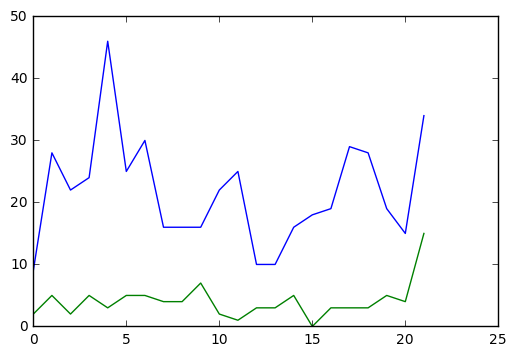

In [520]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(data_frame["New cases"]["Guinea"].values)
plt.plot(data_frame["New deaths"]["Guinea"].values)

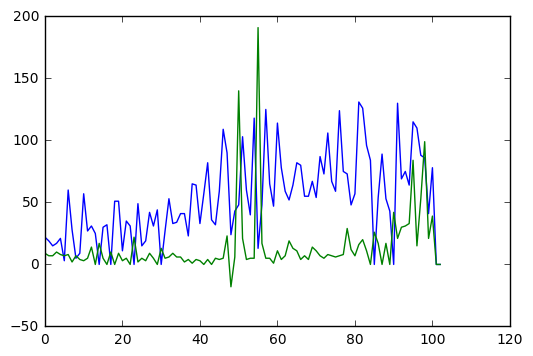

In [521]:
plt.plot(data_frame["New cases"]["SL"].values)
plt.plot(data_frame["New deaths"]["SL"].values)

## References

[Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) Wes McKinney